# Project Main Workbook

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import inv
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import r2_score
from sklearn.svm import LinearSVC, SVC
from category_encoders import TargetEncoder
from category_encoders import BinaryEncoder

/Users/sindhujarai/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## 1) Initial Data Exploration

In [2]:
df = pd.read_csv('Data/Credit_card.csv')
df_label = pd.read_csv('Data/Credit_card_label.csv')

In [3]:
df.head(5)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [4]:
credit_df = df.merge(df_label, on = 'Ind_ID')

In [5]:
credit_df.head(5)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


<b> 2 Plot charts to understand data distribution of the target variable. </b>

Application Approved:  1373  Probability:  0.887
Application Rejected:  175 Probability:  0.113


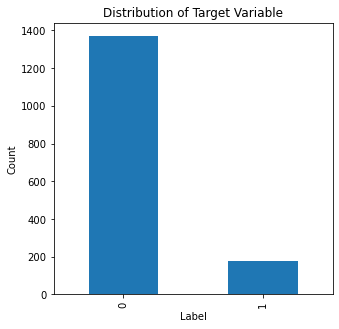

In [6]:
#TARGET VARIABLE DISTRIBUTION

label, count = np.unique(credit_df['label'], return_counts = True)
probability = count/len(credit_df)

print("Application Approved: ", count[0], " Probability: ", probability[0].round(3))
print("Application Rejected: ", count[1], "Probability: ", probability[1].round(3))

plt.figure(figsize = (5, 5))
credit_df['label'].value_counts().plot(kind = 'bar')
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Distribution of Target Variable")
#plt.xticks(rotation = '0')
plt.show()

# 0 -> Approved
# 1 -> Rejected

<b> 3 Plot correlation / stacked bar charts to understand the relationship between each variable and the target variable </b>

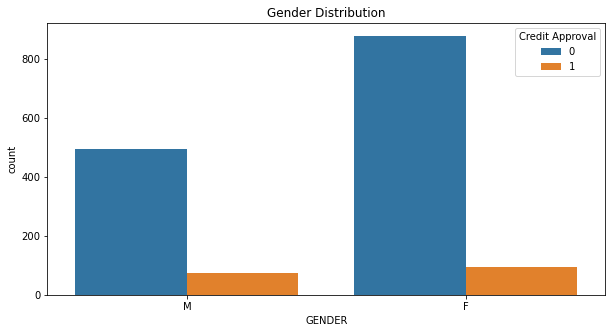

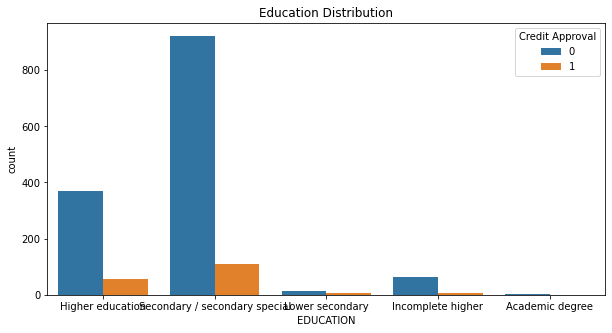

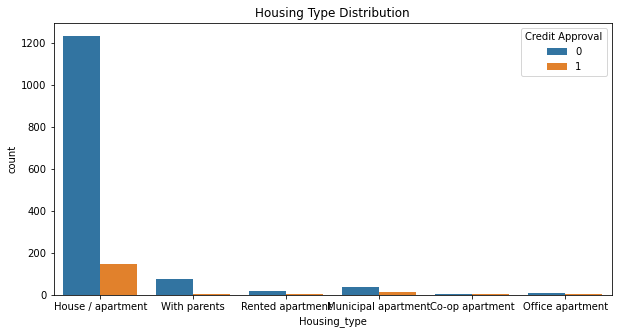

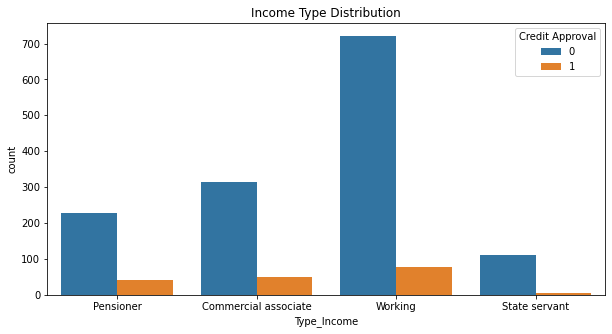

In [7]:
#Distribution of Categorical Variables wrt Target Variable

fig, axes = plt.subplots(figsize = (10, 5))
sns.countplot(data = credit_df, x = 'GENDER', hue = 'label', ax = axes)
plt.legend(loc = 'upper right', title = 'Credit Approval')
plt.title("Gender Distribution")
#plt.xticks(rotation = '45')
plt.show()

fig, axes = plt.subplots(figsize = (10, 5))
sns.countplot(data = credit_df, x = 'EDUCATION', hue = 'label', ax = axes)
plt.legend(loc = 'upper right', title = 'Credit Approval')
plt.title("Education Distribution")
#plt.xticks(rotation = '45')
plt.show()

fig, axes = plt.subplots(figsize = (10, 5))
sns.countplot(data = credit_df, x = 'Housing_type', hue = 'label', ax = axes)
plt.legend(loc = 'upper right', title = 'Credit Approval')
plt.title("Housing Type Distribution")
#plt.xticks(rotation = '45')
plt.show()

fig, axes = plt.subplots(figsize = (10, 5))
sns.countplot(data = credit_df, x = 'Type_Income', hue = 'label', ax = axes)
plt.legend(loc = 'upper right', title = 'Credit Approval')
plt.title("Income Type Distribution")
#plt.xticks(rotation = '45')
plt.show()


<b> 1 Plot charts to understand data distribution of the numerical / categorical variables. </b>

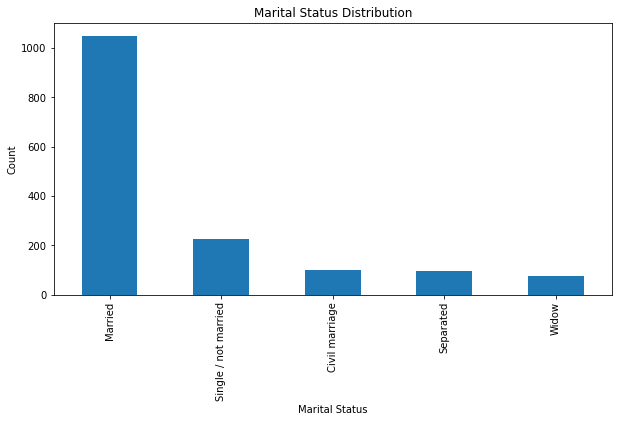

In [8]:
#Marital Status Distribution 

plt.figure(figsize = (10, 5))
credit_df['Marital_status'].value_counts().plot(kind = 'bar')
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.title("Marital Status Distribution")
#plt.xticks(rotation = '45')
plt.show()

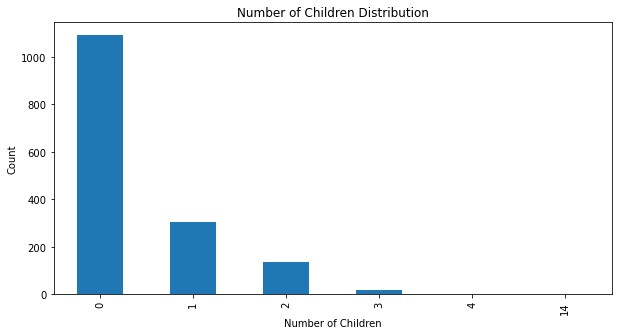

In [9]:
#Number of Children Distribution

plt.figure(figsize = (10, 5))
credit_df['CHILDREN'].value_counts().plot(kind = 'bar')
plt.xlabel("Number of Children")
plt.ylabel("Count")
plt.title("Number of Children Distribution")
#plt.xticks(rotation = '0')
plt.show()

#14 seems to be an outlier

<b> 4 Plot correlation between each of the input variables </b>

In [10]:
credit_df['Employment_Status'] = np.where(credit_df['Employed_days'] > 0 , 'Unemployed', 'Employed')
credit_df['Employed_days'] = credit_df['Employed_days'].apply(lambda x: min(x, 0)) # Lots of errors with Unemployed category - bound at 0 for Unemployed
credit_df.head(5)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,Employment_Status
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,0,1,0,0,0,NaN,2,1,Unemployed
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1,Employed
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1,Employed
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1,Employed
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1,Employed


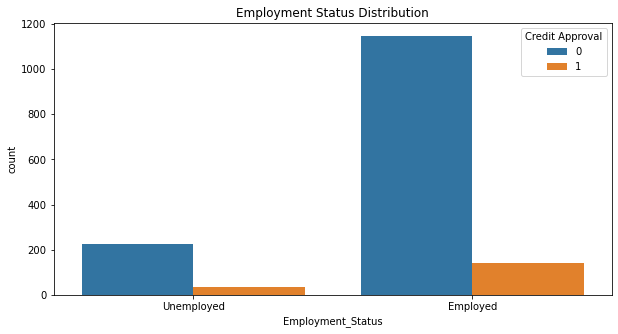

In [11]:
#Employment Status wrt Target Variable

plt.figure(figsize = (10, 5))
sns.countplot(data = credit_df, x = 'Employment_Status', hue = 'label')
plt.legend(loc = 'upper right', title = 'Credit Approval')
plt.title("Employment Status Distribution")
#plt.xticks(rotation = '45')
plt.show()

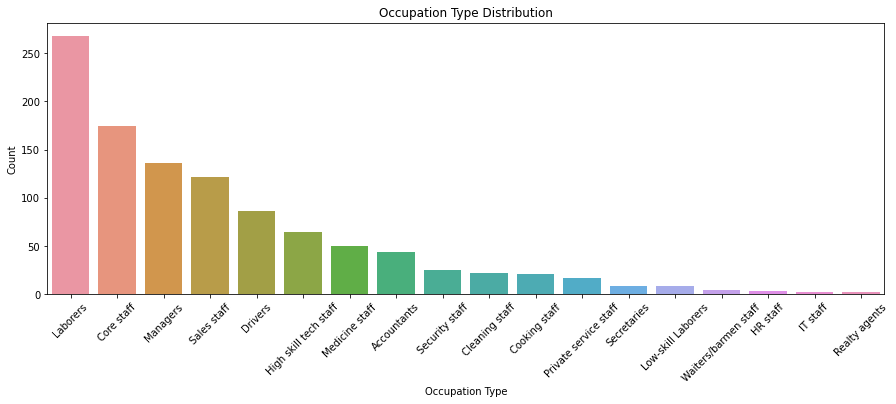

Laborers                 268
Core staff               174
Managers                 136
Sales staff              122
Drivers                   86
High skill tech staff     65
Medicine staff            50
Accountants               44
Security staff            25
Cleaning staff            22
Cooking staff             21
Private service staff     17
Secretaries                9
Low-skill Laborers         9
Waiters/barmen staff       5
HR staff                   3
IT staff                   2
Realty agents              2
Name: Type_Occupation, dtype: int64

In [12]:
#Occupation Type Distribution
plt.figure(figsize = (15, 5))
sns.barplot(x = df['Type_Occupation'].value_counts().index, y = df['Type_Occupation'].value_counts().values)
plt.xlabel('Occupation Type')
plt.ylabel('Count')
plt.title('Occupation Type Distribution')
plt.xticks(rotation = 45)
plt.show()
df['Type_Occupation'].value_counts()

# 2) Cleaning and Sampling

<b> 1 Perform missing value analysis, describe how potentially to encode missing values </b>

In [13]:
missing_values = credit_df.isnull().sum()
cols_with_missing_values = missing_values[missing_values > 0].index.tolist()

print(f"Columns with missing values: {cols_with_missing_values}")

Columns with missing values: ['GENDER', 'Annual_income', 'Birthday_count', 'Type_Occupation']


In [14]:
missing_values_count = credit_df.isnull().sum()
print(missing_values_count)

Ind_ID                 0
GENDER                 7
Car_Owner              0
Propert_Owner          0
CHILDREN               0
Annual_income         23
Type_Income            0
EDUCATION              0
Marital_status         0
Housing_type           0
Birthday_count        22
Employed_days          0
Mobile_phone           0
Work_Phone             0
Phone                  0
EMAIL_ID               0
Type_Occupation      488
Family_Members         0
label                  0
Employment_Status      0
dtype: int64


In [15]:
credit_df['GENDER'].fillna('U', inplace=True)

In [16]:
credit_df['Annual_income'].fillna(credit_df['Annual_income'].median(), inplace=True)

In [17]:
credit_df['Birthday_count'].fillna(credit_df['Birthday_count'].median(), inplace=True)

In [18]:
credit_df['Type_Occupation'].fillna('Unknown', inplace=True)

The columns with missing values can be encoded in the following ways:

1. Gender - Since there are only 7 missing values, a new category can be assigned to it 'U', indicating the gender is Unknown. 

2. Annual Income - Median can be used to fill missing values since it is less affected by outliers and extreme values that might be present. 

3. Birthday Count - Median imputation can be used because it is robust against the influence of outliers and skewed data. 

4. Type of Occupation - The most neutral way to avoid bias in the dataset is to create a new category called "Unknown," as the variable is categorical and the modes of the categories are not highly dominant.

<b> 2 Describe how to encode each of the categorical features ie) OHE, target encoding, ordinal encoding </b>

In [19]:
categorical_columns = credit_df.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'EDUCATION',
       'Marital_status', 'Housing_type', 'Type_Occupation',
       'Employment_Status'],
      dtype='object')


In [20]:
categorical_columns = ['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'EDUCATION',
                       'Marital_status', 'Housing_type', 'Type_Occupation', 'Employment_Status']
categories_dict = {}

for col in categorical_columns:
    categories_dict[col] = credit_df[col].unique()
for col, categories in categories_dict.items():
    print(f"The unique categories in {col} are: {categories}")

The unique categories in GENDER are: ['M' 'F' 'U']
The unique categories in Car_Owner are: ['Y' 'N']
The unique categories in Propert_Owner are: ['Y' 'N']
The unique categories in Type_Income are: ['Pensioner' 'Commercial associate' 'Working' 'State servant']
The unique categories in EDUCATION are: ['Higher education' 'Secondary / secondary special' 'Lower secondary'
 'Incomplete higher' 'Academic degree']
The unique categories in Marital_status are: ['Married' 'Single / not married' 'Civil marriage' 'Separated' 'Widow']
The unique categories in Housing_type are: ['House / apartment' 'With parents' 'Rented apartment'
 'Municipal apartment' 'Co-op apartment' 'Office apartment']
The unique categories in Type_Occupation are: ['Unknown' 'Core staff' 'Cooking staff' 'Laborers' 'Sales staff'
 'Accountants' 'High skill tech staff' 'Managers' 'Cleaning staff'
 'Drivers' 'Low-skill Laborers' 'IT staff' 'Waiters/barmen staff'
 'Security staff' 'Medicine staff' 'Private service staff' 'HR staff'


In [21]:
# Ordinal Encoding for Binary Categorical Variables 
credit_df['Car_Owner'] = credit_df['Car_Owner'].map({'Y': 1, 'N': 0})
credit_df['Propert_Owner'] = credit_df['Propert_Owner'].map({'Y': 1, 'N': 0})
credit_df['Employment_Status'] = credit_df['Employment_Status'].map({'Employed': 1, 'Unemployed': 0})

# Binary Encoding 
bin_encoder = BinaryEncoder(cols=['Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'GENDER'])
credit_df = bin_encoder.fit_transform(credit_df)

#Target Encoding 
target_enc = TargetEncoder(cols=['Type_Occupation'])
credit_df['Type_Occupation_encoded'] = target_enc.fit_transform(credit_df['Type_Occupation'], credit_df['label'])

# Transform or Drop Other Columns
credit_df['Annual_income'] = np.log(credit_df['Annual_income']+1)
credit_df['Employed_days'] = np.log(-1*credit_df['Employed_days']+1)
credit_df.drop(columns = ['Ind_ID', 'Mobile_phone', 'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation'], inplace = True)

* For categorical variables with only 2 categories such as Car Owner, Property Owner, and Employment Status, ordinal encoding is used. 
* For categorical variables with 3+ categories such as Gender, Type of Income, Marital Status, Housing Type and Education, binary encoding is used because it doesn’t impose an ordinal relationship and it reduces the dimensionality compared to one-hot encoding.
* For Type of Occupation, target encoding can be used since it has high cardinality and can capture more information about the target variable within the feature which could be helpful for the predictive model. 

# 3) Insights from Data Exploration


<b> 1 Describe which features if any need to be dropped, scaled, etc. </b>

In [22]:
# Correlation matrix of the features
X = credit_df.drop(columns=['label'])
X.corr().style.background_gradient()

,GENDER_0,GENDER_1,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income_0,Type_Income_1,Type_Income_2,EDUCATION_0,EDUCATION_1,EDUCATION_2,Marital_status_0,Marital_status_1,Marital_status_2,Housing_type_0,Housing_type_1,Housing_type_2,Birthday_count,Employed_days,Family_Members,Employment_Status,Type_Occupation_encoded
GENDER_0,1.000000,-0.990338,-0.366257,0.038264,-0.063068,-0.261578,0.018140,-0.162063,0.030436,0.023769,0.031611,-0.039138,0.157111,-0.008687,-0.034689,-0.022500,-0.092016,0.050599,-0.182646,-0.143313,-0.099406,-0.178164,-0.072712
GENDER_1,-0.990338,1.000000,0.371265,-0.042567,0.061377,0.272329,-0.015680,0.157758,-0.029853,-0.025745,-0.039430,0.047788,-0.155746,0.007084,0.032827,0.020453,0.094398,-0.052128,0.185830,0.143397,0.097558,0.178355,0.073153
Car_Owner,-0.366257,0.371265,1.000000,0.002401,0.063467,0.240758,0.011206,0.122456,-0.054377,-0.026728,-0.124354,0.136424,-0.108939,-0.094159,0.114087,-0.051825,0.018755,0.033034,0.144234,0.127441,0.119851,0.151988,-0.037197
Propert_Owner,0.038264,-0.042567,0.002401,1.000000,-0.003352,0.029209,-0.034443,-0.065293,0.014161,-0.023973,-0.006926,0.039006,0.010517,-0.000017,0.002480,-0.151428,-0.146629,0.214541,-0.124409,-0.091309,-0.004458,-0.100400,0.040626
CHILDREN,-0.063068,0.061377,0.063467,-0.003352,1.000000,0.065001,0.035128,0.169231,-0.074514,0.040460,-0.068209,0.050708,-0.065258,-0.116856,0.115338,-0.047661,0.008397,0.016188,0.277944,0.204940,0.890248,0.219416,-0.051616
Annual_income,-0.261578,0.272329,0.240758,0.029209,0.065001,1.000000,0.045998,0.145728,-0.221171,0.027732,-0.247899,0.228366,-0.045326,0.047315,-0.042895,-0.049977,0.034953,0.010047,0.127576,0.213060,0.046517,0.211530,-0.067953
Type_Income_0,0.018140,-0.015680,0.011206,-0.034443,0.035128,0.045998,1.000000,-0.494672,-0.423904,0.020718,-0.067471,0.050576,-0.022025,-0.003475,0.019347,0.035923,0.007230,-0.011553,0.060405,0.165652,0.042123,0.128171,-0.031496
Type_Income_1,-0.162063,0.157758,0.122456,-0.065293,0.169231,0.145728,-0.494672,1.000000,-0.011717,0.053291,-0.074810,0.048312,-0.164338,0.056963,-0.019612,-0.053880,0.095149,-0.032703,0.496647,0.715289,0.178515,0.782691,-0.071360
Type_Income_2,0.030436,-0.029853,-0.054377,0.014161,-0.074514,-0.221171,-0.423904,-0.011717,1.000000,-0.062136,0.191091,-0.152219,0.076296,-0.054936,0.012491,-0.008105,-0.031622,0.023586,-0.197813,-0.298648,-0.080027,-0.302358,0.073041
EDUCATION_0,0.023769,-0.025745,-0.026728,-0.023973,0.040460,0.027732,0.020718,0.053291,-0.062136,1.000000,-0.316941,-0.125401,0.002652,0.062141,-0.018317,-0.031010,0.048715,-0.006234,0.157438,0.060166,0.025250,0.073092,0.023103


* 'CHILDREN' and 'Family_Members' have correlation of 0.89. 
* 'Employed_days' and 'Employment_Status' have correlation of 0.95

In [23]:
# Drop the 'CHILDREN' column because of its high correlation with 'Family_Members'
# Drop the 'Employment_Status' column because of its high correlation with 'Employed_days'
X.drop(columns=['CHILDREN', 'Employment_Status'], inplace = True)

**Scaling**

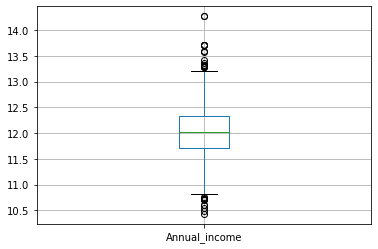

In [24]:
boxplot = X.boxplot(column=['Annual_income'])

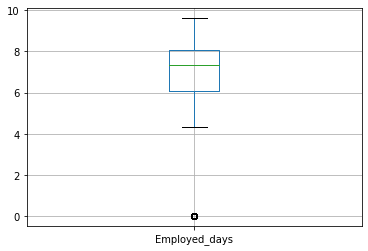

In [25]:
boxplot = X.boxplot(column=['Employed_days'])

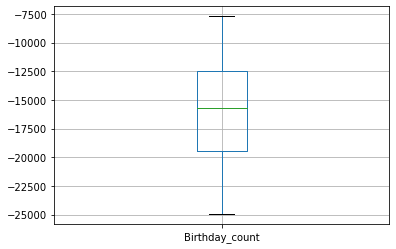

In [26]:
boxplot = X.boxplot(column=['Birthday_count'])

<b> 3 Describe the sampling method for the train/dev split, cross-validation etc. </b>

In [27]:
# Devide the train, val, test dataset. Here keep the X_dev df for the convenience of training the whole dev set after model fine-tuning.
y = credit_df['label']
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


s = StandardScaler()
X_dev = s.fit_transform(X_dev)
X_test = s.transform(X_test)

In [28]:
X_dev

array([[-1.318688  ,  1.30501217, -0.81759624, ...,  0.40640629,
        -0.17143613, -0.27212922],
       [ 0.75832949, -0.76627638,  1.2230976 , ...,  0.3659575 ,
        -0.17143613,  0.89497226],
       [ 0.75832949, -0.76627638, -0.81759624, ...,  0.55149892,
        -0.17143613, -0.27997283],
       ...,
       [ 0.75832949, -0.76627638, -0.81759624, ...,  0.12595023,
         0.84893852, -2.05944977],
       [-1.318688  ,  1.30501217,  1.2230976 , ..., -0.06201838,
        -0.17143613, -0.27212922],
       [ 0.75832949, -0.76627638, -0.81759624, ..., -2.09910319,
        -1.19181077,  0.24272366]])

The number of approved applications significantly outnumber the rejected ones - to maintain the distribution of the label across train, test and validation sets, stratified sampling is used. It ensures that each set has the same percentage of samples of each target class as the complete set. 



Overall findings from (1)-(2) </b>

The dataset is imbalanced. It's a combination of categorical and numerical features. 

There are missing values in the column 'GENDER', 'Annual_income', 'Birthday_count', and 'Type_Occupation'. We create a new category of Unknown for the NAN in 'GENDER' and 'Type_Occupation', and fill the NAN in 'Annual_income' and 'Birthday_count' with the median respectively.

Then we use ordinal encoding for categorical variables with only 2 categories, one-hot encoding for categorical variables with 3+ categories, and target encoding for 'Type_Occupation'. Then we scale the whole dataset.

We drop columns that are irrelevant (contain ID information) and columns with high correlation (>0.8). Then we use stratified sampling to split 80% of the dataset to the development set, and 20% to testing set.

# 4) Machine Learning Techniques Implemented

For all machine learning techniques, use:
* Oversampling, Undersampling, SMOTE, etc.
* Appropriate model evaluation metric (can use accuracy if resampling is used)
* 5-fold Cross-Validation on Development set
* Hyperparameter tuning

In [29]:
y_dev.shape

(1238,)

In [30]:
from imblearn.over_sampling import RandomOverSampler


oversample = RandomOverSampler(random_state = 42)
X_dev_oversample, y_dev_oversample = oversample.fit_resample(X_dev, y_dev)

print("Positive and Negative Labels after Oversampling:\n", y_dev_oversample.value_counts())
print("\nShape of Development Set: ", X_dev_oversample.shape)

Positive and Negative Labels after Oversampling:
 0    1098
1    1098
Name: label, dtype: int64

Shape of Development Set:  (2196, 21)


<b> 2.1 Decision Tree </b>

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report, precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import StratifiedKFold

param_grid = {
    "max_depth" : [10, 20],
    "min_samples_split" : [2, 5, 10],
    "min_samples_leaf" : [1, 2, 5]
}
best_dt = GridSearchCV(DecisionTreeClassifier(random_state = 42),
                                             param_grid = param_grid,
                                             cv = StratifiedKFold(n_splits = 5, shuffle = False),
                                             scoring = 'f1')
best_dt.fit(X_dev_oversample, y_dev_oversample)
print("Optimal Hyperparamaters: ", best_dt.best_params_)

In [32]:
best_dt_model = DecisionTreeClassifier(max_depth = best_dt.best_params_['max_depth'],
                                       min_samples_split = best_dt.best_params_['min_samples_split'],
                                      min_samples_leaf = best_dt.best_params_['min_samples_leaf'])
best_dt_model.fit(X_dev_oversample, y_dev_oversample)
dt_pred = best_dt_model.predict(X_test)

accuracy = accuracy_score(y_test, dt_pred)
print("Performance of the optimal model on the test dataset: ", accuracy)
print("Train Score: ", best_dt_model.score(X_dev_oversample, y_dev_oversample))
print("Test Score: ", best_dt_model.score(X_test, y_test))
precision = precision_score(y_test, dt_pred)
print("Precision Score: ", precision)
print("Classification Report")
print(classification_report(y_test, dt_pred))

Performance of the optimal model on the test dataset:  0.832258064516129
Train Score:  0.9954462659380692
Test Score:  0.832258064516129
Precision Score:  0.3333333333333333
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       275
           1       0.33      0.49      0.40        35

    accuracy                           0.83       310
   macro avg       0.63      0.68      0.65       310
weighted avg       0.86      0.83      0.85       310



Test score of 84.5%

In [33]:

dt = DecisionTreeClassifier(random_state = 42, max_depth = best_dt.best_params_['max_depth'],
                                       min_samples_split = best_dt.best_params_['min_samples_split'],
                                      min_samples_leaf = best_dt.best_params_['min_samples_leaf'])
scores = cross_validate(dt, X_dev_oversample, y_dev_oversample, cv = 5, scoring = ['roc_auc', 'average_precision'
                                                                                  , 'precision', 'f1'])
dt = dt.fit(X_dev_oversample, y_dev_oversample)

print("AUC Values after Oversampling: ", scores['test_roc_auc'])
print("Average Precision Values after Oversampling: ", scores['test_average_precision'])
print("F1 Scores after Oversampling: ", scores['test_f1'])
print("Precision Scores after Oversampling: ", scores['test_precision'])

AUC Values after Oversampling:  [0.9422624  0.93686177 0.9550851  0.9503736  0.96139477]
Average Precision Values after Oversampling:  [0.89651742 0.8872883  0.91629128 0.90985031 0.9288763 ]
F1 Scores after Oversampling:  [0.94623656 0.94396552 0.95424837 0.95444685 0.95860566]
Precision Scores after Oversampling:  [0.89795918 0.89387755 0.9125     0.91286307 0.92050209]


<b> 2.2 Random Forest </b>

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
parameters = {"n_estimators": [80, 100, 150, 200, 300],
              "max_depth":  [5, 6, 8, 10, 15],
             "min_samples_split": [2, 3, 4, 5, 10]}

In [39]:
# best_param_model = GridSearchCV(rf_model, param_grid = parameters)
best_param_model = GridSearchCV(RandomForestClassifier(random_state = 42),
                                             param_grid = parameters,
                                             cv = StratifiedKFold(n_splits = 5, shuffle = False),
                                             scoring = 'f1')
best_param_model.fit(X_dev_oversample, y_dev_oversample)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 6, 8, 10, 15],
                         'min_samples_split': [2, 3, 4, 5, 10],
                         'n_estimators': [80, 100, 150, 200, 300]},
             scoring='f1')

In [40]:
print("Optimal Hyperparamaters: ", best_param_model.best_params_)

Optimal Hyperparamaters:  {'max_depth': 15, 'min_samples_split': 4, 'n_estimators': 300}


In [43]:
best_rf_model = RandomForestClassifier(max_depth = best_param_model.best_params_['max_depth'],
                                       n_estimators = best_param_model.best_params_['n_estimators'],
                                       min_samples_split = best_param_model.best_params_['min_samples_split']
                                       
                                      )
best_rf_model.fit(X_dev_oversample, y_dev_oversample)
rf_pred = best_rf_model.predict(X_test)

accuracy = accuracy_score(y_test, rf_pred)
print("Performance of the optimal model on the test dataset: ", accuracy)
print("Train Score: ", best_param_model.score(X_dev_oversample, y_dev_oversample))
print("Test Score: ", best_param_model.score(X_test, y_test))
print("Precision Score: ", precision_score(y_test, rf_pred))
print("Classification Report")
print(classification_report(y_test, rf_pred))

Performance of the optimal model on the test dataset:  0.9258064516129032
Train Score:  0.9959183673469388
Test Score:  0.5862068965517241
Precision Score:  0.75
Classification Report
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       275
           1       0.75      0.51      0.61        35

    accuracy                           0.93       310
   macro avg       0.85      0.75      0.78       310
weighted avg       0.92      0.93      0.92       310



Test Score - 58.62%
Precision Score - 78.26%

In [42]:
rf = RandomForestClassifier(max_depth = best_param_model.best_params_['max_depth'],
                                       n_estimators = best_param_model.best_params_['n_estimators'],
                                       min_samples_split = best_param_model.best_params_['min_samples_split'])
rf_scores = cross_validate(rf, X_dev_oversample, y_dev_oversample, cv = 5, scoring = ['roc_auc', 'average_precision'
                                                                                     , 'precision', 'f1'])
rf = rf.fit(X_dev_oversample, y_dev_oversample)

print("AUC Values after Oversampling: ", rf_scores['test_roc_auc'])
print("Average Precision Values after Oversampling: ", rf_scores['test_average_precision'])
print("F1 Scores after Oversampling: ", rf_scores['test_f1'])
print("Precision Scores after Oversampling: ", rf_scores['test_precision'])

AUC Values after Oversampling:  [0.98992769 0.99516397 0.9965027  0.99787256 0.99842258]
Average Precision Values after Oversampling:  [0.97574947 0.99239451 0.99361258 0.99702644 0.99810085]
F1 Scores after Oversampling:  [0.96428571 0.98426966 0.99545455 0.98876404 0.98434004]
Precision Scores after Oversampling:  [0.94736842 0.96902655 0.99095023 0.97777778 0.969163  ]


<b> 1.1 Logistic Regression </b>

<b> 1.2 Support Vector Machines </b>

<b> 3 Gradient-Boosted Tree </b>

<b> 4 Deep Learning (DNN) </b>